# Part -2: Extrapolating findings to other communities in Twitter

In [2]:
import re, json, requests
import pandas as pd
import math

## Reading the Scraped Tweet Dump

In [3]:
url = 'https://raw.githubusercontent.com/rohitashwachaks/Social-Media-Influencer-analysis/main/Twitter-Influencers/F1_Database/f1_tweets.json'

In [4]:
resp = requests.get(url)
resp_parsed = re.sub(r'^jsonp\d+\(|\)\s+$', '', resp.text)
data = json.loads(resp_parsed)

In [5]:
data = pd.DataFrame(data)
data

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,extended_tweet,retweeted_status,extended_entities
0,Wed Feb 09 20:17:20 +0000 2022,1491506524690210817,1491506524690210817,@martinleblanc This made me laugh\n\nhttps://t...,"[15, 58]","<a href=""http://twitter.com/download/iphone"" r...",False,1.491505e+18,1491505262485725185,8.211287e+08,...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,1644437840994,NaN,NaN,NaN
1,Wed Feb 09 20:17:21 +0000 2022,1491506527328477188,1491506527328477188,@abdilla_faishal @Dainty00089412 @LozBarber30 ...,"[78, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.491506e+18,1491506084447543296,7.028391e+17,...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,NaN,low,en,1644437841623,{'full_text': '@abdilla_faishal @Dainty0008941...,NaN,NaN
2,Wed Feb 09 20:17:21 +0000 2022,1491506528830078978,1491506528830078978,Wow. They literally quoted me in the article! ...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,"{'hashtags': [{'text': 'F1', 'indices': [104, ...",False,False,False,low,en,1644437841981,NaN,NaN,NaN
3,Wed Feb 09 20:17:23 +0000 2022,1491506534244831243,1491506534244831243,"@dami_willis I respect that, I respect you in ...","[13, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.491494e+18,1491493831992295427,7.310150e+07,...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,NaN,low,en,1644437843272,"{'full_text': '@dami_willis I respect that, I ...",NaN,NaN
4,Wed Feb 09 20:17:23 +0000 2022,1491506535419498496,1491506535419498496,RT @F1: What a difference a year makes! 🔍\n\n#...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,"{'hashtags': [{'text': 'F1', 'indices': [43, 4...",False,False,False,low,en,1644437843552,NaN,{'created_at': 'Wed Feb 09 16:39:45 +0000 2022...,"{'media': [{'id': 1491451506243121152, 'id_str..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Wed Feb 09 21:24:01 +0000 2022,1491523305504792579,1491523305504792579,@NadineeLuu @F1 @Max33Verstappen That’s called...,"[33, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.491503e+18,1491503469445980162,1.650939e+09,...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,NaN,low,en,1644441841852,{'full_text': '@NadineeLuu @F1 @Max33Verstappe...,NaN,NaN
4996,Wed Feb 09 21:24:02 +0000 2022,1491523309820956680,1491523309820956680,Lando Norris extends his F1 contract with McLa...,NaN,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",False,NaN,None,NaN,...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,1644441842881,NaN,NaN,NaN
4997,Wed Feb 09 21:24:05 +0000 2022,1491523318981304328,1491523318981304328,RT @BradleyPhilpot: For the people telling me ...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,NaN,low,en,1644441845065,NaN,{'created_at': 'Wed Feb 09 21:06:43 +0000 2022...,NaN
4998,Wed Feb 09 21:24:05 +0000 2022,1491523322001039360,1491523322001039360,"RT @redbullracing: Introducing the lean, mean,...",NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,NaN,None,NaN,...,"{'hashtags': [{'text': 'RB18', 'indices': [47,...",False,False,False,low,en,1644441845785,NaN,{'created_at': 'Wed Feb 09 16:24:16 +0000 2022...,"{'media': [{'id': 1491436960824582146, 'id_str..."


## Data Preprocessing

In [5]:
#creating list to store information
user_provide = []
user_receive = []
attention_type = []

In [6]:
for i in range(len(data)):
    
   #reply
    if data.in_reply_to_screen_name[i] != None:
        user_provide.append(data.user[i].get('screen_name'))
        user_receive.append(data.in_reply_to_screen_name[i])
        attention_type.append('reply')
    
    #retweet
    if type(data.retweeted_status[i]) == dict:
        user_provide.append(data.user[i].get('screen_name'))
        user_receive.append(data.retweeted_status[i].get('user').get('screen_name'))
        attention_type.append('RT')
    
    #mention
    if len(data.entities[i].get('user_mentions'))!=0:
        for j in range(len(data.entities[i].get('user_mentions'))):
            user_provide.append(data.user[i].get('screen_name'))
            user_receive.append(data.entities[i].get('user_mentions')[j].get('screen_name'))
            attention_type.append('mention')
        
        

In [7]:
#extract information from tweets 
network_data = pd.DataFrame({'user_provide':user_provide,'user_receive':user_receive,'attention_type':attention_type})


## Data Transformation for network visualization

In [9]:
network_data = pd.DataFrame({'user_provide':user_provide,'user_receive':user_receive,'attention_type':attention_type})
n = pd.DataFrame(network_data[['user_provide','user_receive','attention_type']].groupby(['user_provide','user_receive'])['attention_type'].agg('count'))
n.to_csv('f1_network_links.csv')

In [10]:
participants = {}
for i in set(network_data.user_provide).union(set(network_data.user_receive)):
    participants[i] = 1
participants = pd.Series(participants)
participants.to_csv('f1_network_participants.csv')

In [11]:
n = pd.crosstab(network_data.user_provide, network_data.user_receive)
idx = n.columns.union(n.index)
n = n.reindex(index = idx, columns=idx, fill_value=0)
n.to_csv('f1_network_adjacency.csv')

## Creating Network

In [13]:
import networkx as nx 
import matplotlib.pyplot as plt

In [14]:
G = nx.DiGraph(directed=True)

In [15]:
G.add_nodes_from((network_data.user_provide+network_data.user_receive).unique())
G.add_edges_from(tuple(zip(network_data.user_provide,network_data.user_receive)))

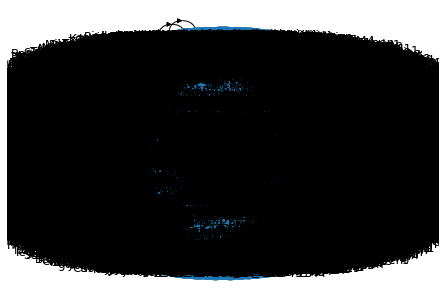

In [16]:
#Drawing Network
nx.draw(G, with_labels=True)
plt.show() 

## Calculating Network Centralities

In [18]:
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

In [19]:
centrality = pd.DataFrame(degree,index=['degree']).T

In [20]:
centrality['betweenness'] = pd.DataFrame(betweenness,index=['betweenness']).T.betweenness
centrality['closeness'] = pd.DataFrame(closeness,index=['closeness']).T.closeness
centrality = centrality.reset_index().rename(columns={'index':'name'})

In [21]:
for i in range(len(centrality)):
    centrality.loc[i,'sum'] = centrality.loc[i,'degree']+centrality.loc[i,'betweenness']+centrality.loc[i,'closeness']

In [22]:
#Top 10 most important user in the network based on sum of centralities
centrality.sort_values('sum',ascending = False).head(10)

,name,degree,betweenness,closeness,sum
6988,F1,0.132978,0.000025,0.132510,0.265513
6995,redbullracing,0.074846,0.000000,0.072434,0.147280
6987,F1_Jordan,0.055744,0.000000,0.054802,0.110547
7223,McLarenF1,0.006061,0.000000,0.070166,0.076227
10261,lawrobarretto,0.003582,0.000000,0.068921,0.072502
6997,Max33Verstappen,0.034071,0.000000,0.032887,0.066958
7070,fia,0.014235,0.000000,0.017102,0.031337
9761,MrNickKnowles,0.009000,0.000002,0.011704,0.020706
7029,RobLMyers,0.007622,0.000004,0.007925,0.015552
7031,Independent,0.006245,0.000000,0.009257,0.015502


## Inference

F1 is the pinnacle of motorsport. However, due to its exhorbitant cost of entry, it has largely remained a s

 With the advent of Social Media, F1 has witnessed an explosion in 

***